In [91]:
from skimage import io, color, filters, measure, morphology, feature
import skimage.util as util
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
import numpy as np

In [92]:
imagen = "Imagenes/Suela1.jpeg"
img = io.imread(imagen)


In [93]:
gray_image = color.rgb2gray(img)


In [94]:
smooth_image = filters.gaussian(gray_image, sigma=2.0) # Filtro gaussiano para reducir ruido


In [95]:
edges = filters.sobel(smooth_image) # Filtro de Sobel para detección de bordes


# Resultado

In [96]:
cleaned_edges = morphology.opening(edges, morphology.disk(1)) # Apertura para limpiar bordes


# Con Binario

In [97]:
threshold_value = filters.threshold_otsu(edges) # Umbral de Otsu para binarizar la imagen
binary_image = edges > threshold_value # Binarización


In [98]:
cleaned_edges_binary = morphology.opening(binary_image, morphology.disk(1)) # Apertura para limpiar bordes


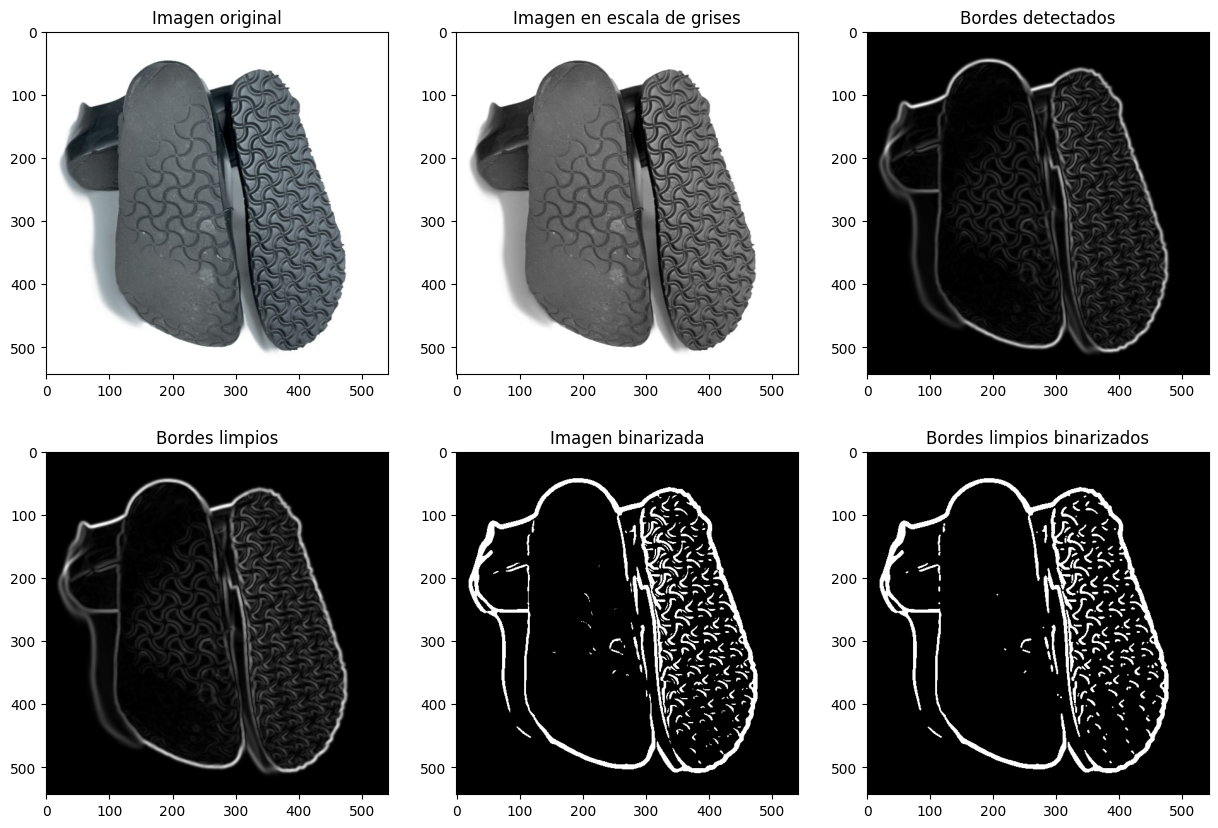

In [99]:
# grafica de todas la imagenes 
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(img)
axs[0, 0].set_title('Imagen original')
axs[0, 1].imshow(gray_image, cmap='gray')
axs[0, 1].set_title('Imagen en escala de grises')
axs[0, 2].imshow(edges, cmap='gray')
axs[0, 2].set_title('Bordes detectados')
axs[1, 0].imshow(cleaned_edges, cmap='gray')
axs[1, 0].set_title('Bordes limpios')
axs[1, 1].imshow(binary_image, cmap='gray')
axs[1, 1].set_title('Imagen binarizada')
axs[1, 2].imshow(cleaned_edges_binary, cmap='gray')
axs[1, 2].set_title('Bordes limpios binarizados')

plt.show()
